In [1]:
library(ROCR)
library(dplyr)

Warning message:
"package 'ROCR' was built under R version 3.6.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
survey <- read.csv('전처리/2번설문/change_harmony.csv')

In [3]:
str(survey)
head(survey)

'data.frame':	96 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 1 1 1 1 1 ...
 $ age_class  : int  20 20 20 20 20 30 30 20 30 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 1 2 1 1 1 2 2 1 2 2 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 1 2 1 2 1 2 1 1 1 2 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 2 1 1 2 3 1 ...
 $ interest   : int  3 5 5 3 3 4 3 3 5 1 ...
 $ comp       : int  3 5 5 5 2 3 3 2 2 5 ...
 $ triangle1  : int  4 5 5 5 4 2 5 5 5 4 ...
 $ triangle2  : int  3 4 4 2 3 2 3 3 1 2 ...
 $ doubleness1: int  2 1 2 5 4 5 2 1 5 1 ...
 $ doubleness2: int  2 2 2 4 3 4 3 5 2 4 ...
 $ doubleness3: int  1 3 1 5 1 5 5 3 1 2 ...


X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Female,20,bright,bright,clothes,3,3,4,3,2,2,1
1,Male,20,harmony,harmony,clothes,5,5,5,4,1,2,3
2,Female,20,bright,bright,clothes,5,5,5,4,2,2,1
3,Male,20,bright,harmony,clothes,3,5,5,2,5,4,5
4,Female,20,bright,bright,cosmetic,3,2,4,3,4,3,1
5,Female,30,harmony,harmony,clothes,4,3,2,2,5,4,5


In [4]:
survey$comp1 <- case_when(
    survey$comp == 1 ~ 1,
    survey$comp != 1 ~ 0)

survey$comp2 <- case_when(
    survey$comp == 2 ~ 1,
    survey$comp != 2 ~ 0)

survey$comp3 <- case_when(
    survey$comp == 3 ~ 1,
    survey$comp != 3 ~ 0)

survey$comp4 <- case_when(
    survey$comp == 4 ~ 1,
    survey$comp != 4 ~ 0)

survey$comp5 <- case_when(
    survey$comp == 5 ~ 1,
    survey$comp != 5 ~ 0)

survey$t1_1 <- case_when(
    survey$triangle1 == 1 ~ 1,
    survey$triangle1 != 1 ~ 0)

survey$t1_2 <- case_when(
    survey$triangle1 == 2 ~ 1,
    survey$triangle1 != 2 ~ 0)

survey$t1_3 <- case_when(
    survey$triangle1 == 3 ~ 1,
    survey$triangle1 != 3 ~ 0)

survey$t1_4 <- case_when(
    survey$triangle1 == 4 ~ 1,
    survey$triangle1 != 4 ~ 0)

survey$t1_5 <- case_when(
    survey$triangle1 == 5 ~ 1,
    survey$triangle1 != 5 ~ 0)
	
survey$t2_1 <- case_when(
    survey$triangle2 == 1 ~ 1,
    survey$triangle2 != 1 ~ 0)

survey$t2_2 <- case_when(
    survey$triangle2 == 2 ~ 1,
    survey$triangle2 != 2 ~ 0)

survey$t2_3 <- case_when(
    survey$triangle2 == 3 ~ 1,
    survey$triangle2 != 3 ~ 0)

survey$t2_4 <- case_when(
    survey$triangle2 == 4 ~ 1,
    survey$triangle2 != 4 ~ 0)

survey$t2_5 <- case_when(
    survey$triangle2 == 5 ~ 1,
    survey$triangle2 != 5 ~ 0)
	
survey$d1_1 <- case_when(
    survey$doubleness1 == 1 ~ 1,
    survey$doubleness1 != 1 ~ 0)

survey$d1_2 <- case_when(
    survey$doubleness1 == 2 ~ 1,
    survey$doubleness1 != 2 ~ 0)

survey$d1_3 <- case_when(
    survey$doubleness1 == 3 ~ 1,
    survey$doubleness1 != 3 ~ 0)

survey$d1_4 <- case_when(
    survey$doubleness1 == 4 ~ 1,
    survey$doubleness1 != 4 ~ 0)

survey$d1_5 <- case_when(
    survey$doubleness1 == 5 ~ 1,
    survey$doubleness1 != 5 ~ 0)
	
survey$d2_1 <- case_when(
    survey$doubleness2 == 1 ~ 1,
    survey$doubleness2 != 1 ~ 0)

survey$d2_2 <- case_when(
    survey$doubleness2 == 2 ~ 1,
    survey$doubleness2 != 2 ~ 0)

survey$d2_3 <- case_when(
    survey$doubleness2 == 3 ~ 1,
    survey$doubleness2 != 3 ~ 0)

survey$d2_4 <- case_when(
    survey$doubleness2 == 4 ~ 1,
    survey$doubleness2 != 4 ~ 0)

survey$d2_5 <- case_when(
    survey$doubleness2 == 5 ~ 1,
    survey$doubleness2 != 5 ~ 0)
	
survey$d3_1 <- case_when(
    survey$doubleness3 == 1 ~ 1,
    survey$doubleness3 != 1 ~ 0)

survey$d3_2 <- case_when(
    survey$doubleness3 == 2 ~ 1,
    survey$doubleness3 != 2 ~ 0)

survey$d3_3 <- case_when(
    survey$doubleness3 == 3 ~ 1,
    survey$doubleness3 != 3 ~ 0)

survey$d3_4 <- case_when(
    survey$doubleness3 == 4 ~ 1,
    survey$doubleness3 != 4 ~ 0)

survey$d3_5 <- case_when(
    survey$doubleness3 == 5 ~ 1,
    survey$doubleness3 != 5 ~ 0)

In [5]:
head(survey)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,...,d2_1,d2_2,d2_3,d2_4,d2_5,d3_1,d3_2,d3_3,d3_4,d3_5
0,Female,20,bright,bright,clothes,3,3,4,3,...,0,1,0,0,0,1,0,0,0,0
1,Male,20,harmony,harmony,clothes,5,5,5,4,...,0,1,0,0,0,0,0,1,0,0
2,Female,20,bright,bright,clothes,5,5,5,4,...,0,1,0,0,0,1,0,0,0,0
3,Male,20,bright,harmony,clothes,3,5,5,2,...,0,0,0,1,0,0,0,0,0,1
4,Female,20,bright,bright,cosmetic,3,2,4,3,...,0,0,1,0,0,1,0,0,0,0
5,Female,30,harmony,harmony,clothes,4,3,2,2,...,0,0,0,1,0,0,0,0,0,1


In [6]:
train <- survey[1:67, ]
test <- survey[68:96, ]

In [7]:
model <- glm(comp1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


Call:
glm(formula = comp1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0396  -0.6186  -0.4729  -0.3849   2.1713  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.03723    1.38692   0.027    0.979
sexMale           -0.16052    0.89015  -0.180    0.857
definitionharmony -0.96164    0.84788  -1.134    0.257
needharmony       -0.67891    0.82230  -0.826    0.409
purposecosmetic   -0.59200    1.03444  -0.572    0.567
purposeetc        -0.53810    1.02666  -0.524    0.600
interest          -0.12346    0.32791  -0.377    0.707

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.836  on 66  degrees of freedom
Residual deviance: 55.629  on 60  degrees of freedom
AIC: 69.629

Number of Fisher Scoring iterations: 5


In [8]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,59.83573,NA
sex,1,0.1612433,65,59.67448,0.68801443
definition,1,2.8621996,64,56.81228,0.09068341
need,1,0.5485269,63,56.26376,0.45892023
purpose,2,0.4926346,61,55.77112,0.78167417
interest,1,0.1421683,60,55.62895,0.70613486


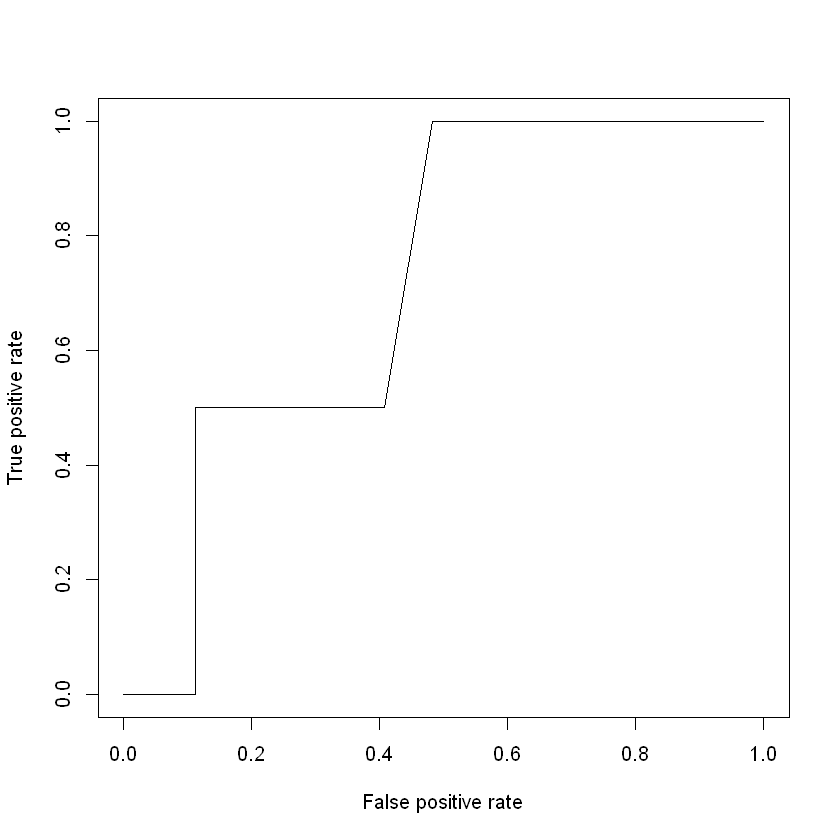

In [9]:
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [10]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.7222222


Call:
glm(formula = comp2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4454  -0.7706  -0.6584   0.9866   1.9991  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -1.7515     1.1928  -1.468   0.1420  
sexMale            -0.2212     0.7815  -0.283   0.7771  
definitionharmony  -0.6550     0.8001  -0.819   0.4130  
needharmony         0.9253     0.7472   1.238   0.2156  
purposecosmetic     1.6698     0.8354   1.999   0.0456 *
purposeetc          0.5104     0.8359   0.611   0.5414  
interest            0.1385     0.2641   0.524   0.6000  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 81.686  on 66  degrees of freedom
Residual deviance: 73.855  on 60  degrees of freedom
AIC: 87.855

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,81.68565,NA
sex,1,1.6687626,65,80.01688,0.1964244
definition,1,0.1923399,64,79.82454,0.6609762
need,1,1.3472124,63,78.47733,0.2457660
purpose,2,4.3442992,61,74.13303,0.1139324
interest,1,0.2781284,60,73.85490,0.5979306


[1] 0.4940476

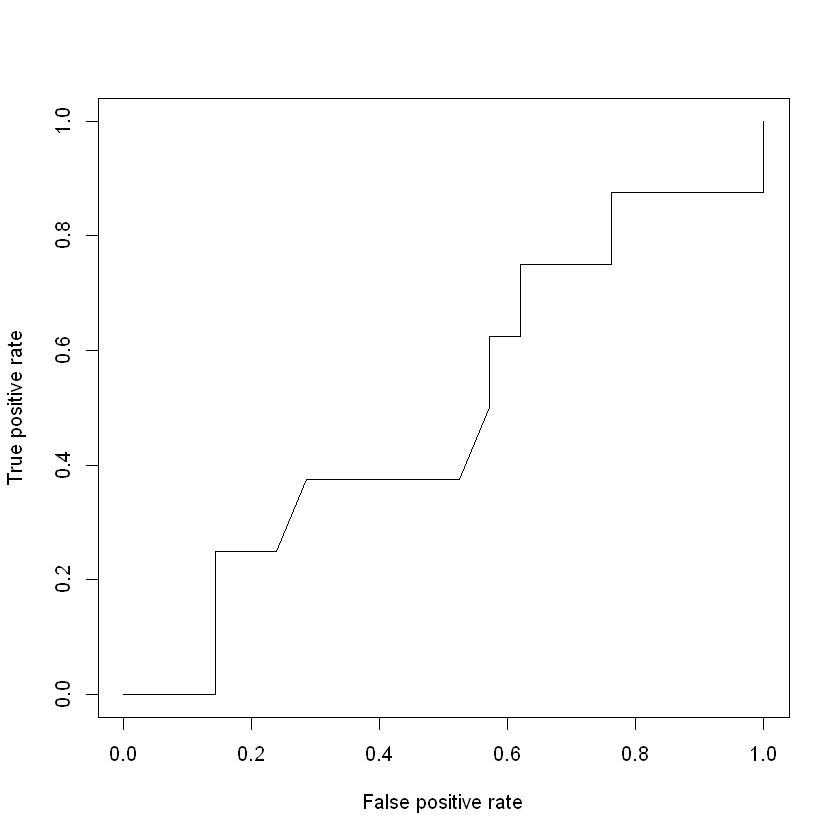

In [11]:
model <- glm(comp2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3812  -0.7722  -0.4031  -0.3168   2.2989  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.69374    1.35888  -1.246   0.2126  
sexMale           -0.07744    0.78926  -0.098   0.9218  
definitionharmony  1.57963    0.97315   1.623   0.1045  
needharmony       -1.30178    0.72202  -1.803   0.0714 .
purposecosmetic   -1.70298    1.21550  -1.401   0.1612  
purposeetc        -1.58879    1.02968  -1.543   0.1228  
interest           0.14535    0.28835   0.504   0.6142  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 71.258  on 66  degrees of freedom
Residual deviance: 62.217  on 60  degrees of freedom
AIC: 76.217

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,71.25796,NA
sex,1,1.0468927,65,70.21107,0.30622380
definition,1,0.8343359,64,69.37673,0.36102175
need,1,3.3815009,63,65.99523,0.06593199
purpose,2,3.5216012,61,62.47363,0.17190718
interest,1,0.2565195,60,62.21711,0.61252148


[1] 0.5539216

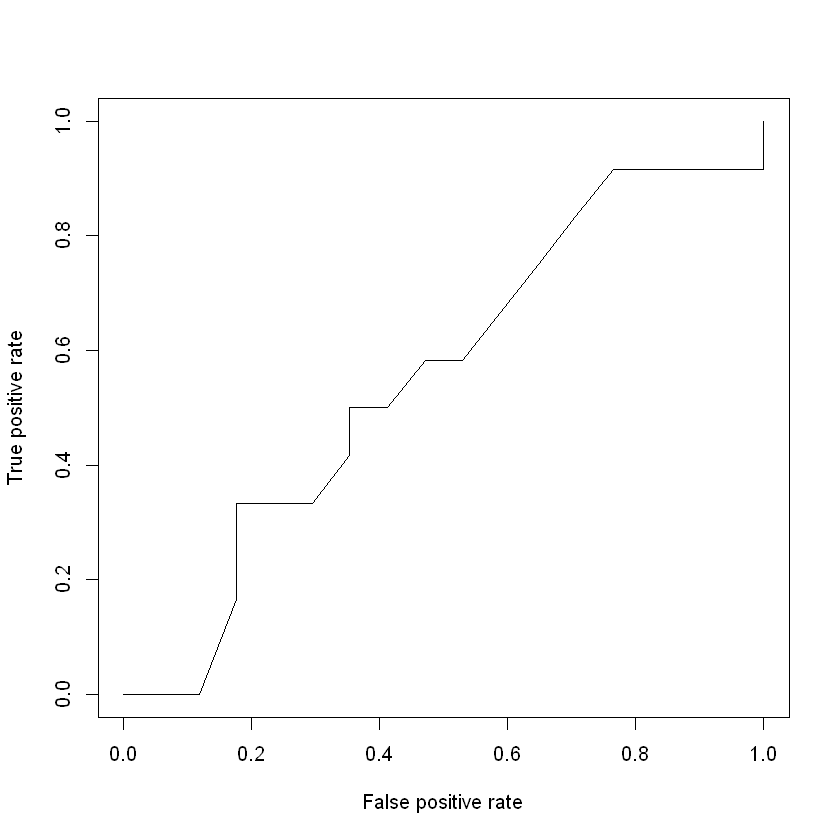

In [12]:
model <- glm(comp3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3023  -0.4312  -0.3240  -0.2378   2.4565  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.73151    1.99222  -1.371   0.1703  
sexMale           -0.07128    1.28606  -0.055   0.9558  
definitionharmony  1.04128    1.29352   0.805   0.4208  
needharmony       -0.32902    0.90682  -0.363   0.7167  
purposecosmetic    0.68702    1.51343   0.454   0.6499  
purposeetc         2.56344    1.19307   2.149   0.0317 *
interest          -0.29218    0.36059  -0.810   0.4178  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 52.867  on 66  degrees of freedom
Residual deviance: 42.168  on 60  degrees of freedom
AIC: 56.168

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,52.86738,NA
sex,1,1.74956698,65,51.11781,0.18593118
definition,1,1.90292431,64,49.21489,0.16775136
need,1,0.09438654,63,49.12050,0.75867294
purpose,2,6.27261332,61,42.84789,0.04344295
interest,1,0.67978657,60,42.16810,0.40966023


[1] 0.3974359

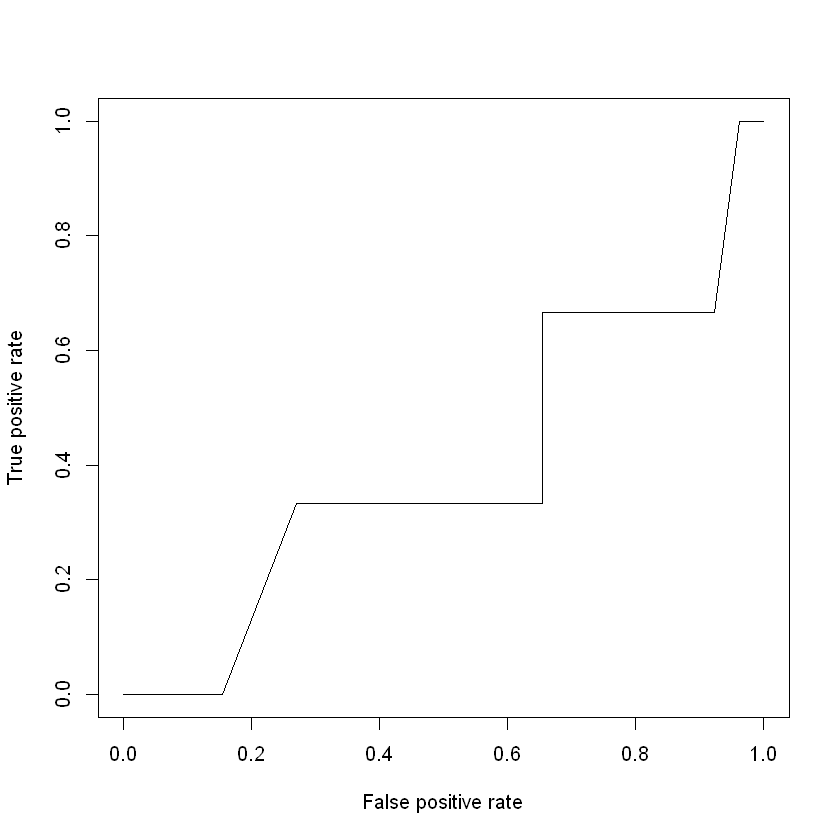

In [13]:
model <- glm(comp4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9768  -0.7079  -0.4419  -0.2239   2.1783  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       -2.081895   1.434304  -1.452    0.147
sexMale            0.445453   0.840704   0.530    0.596
definitionharmony -0.558541   1.087503  -0.514    0.608
needharmony        1.581034   0.991220   1.595    0.111
purposecosmetic   -0.877305   1.220488  -0.719    0.472
purposeetc        -1.226702   1.239784  -0.989    0.322
interest           0.002879   0.304397   0.009    0.992

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 62.984  on 66  degrees of freedom
Residual deviance: 54.723  on 60  degrees of freedom
AIC: 68.723

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,62.98440,NA
sex,1,3.688215e+00,65,59.29619,0.05479824
definition,1,2.738646e-02,64,59.26880,0.86855946
need,1,3.229252e+00,63,56.03955,0.07233370
purpose,2,1.316439e+00,61,54.72311,0.51777248
interest,1,8.948094e-05,60,54.72302,0.99245257


[1] 0.42

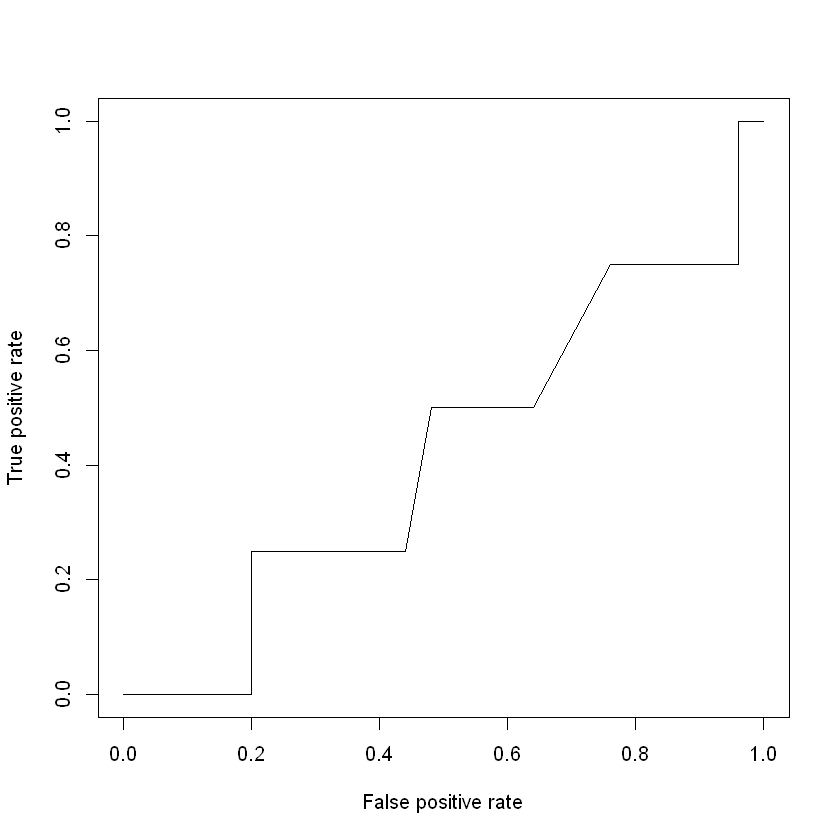

In [14]:
model <- glm(comp5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5210  -0.4311  -0.3698  -0.3276   2.4307  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -3.45836    1.98536  -1.742   0.0815 .
sexMale           -0.32463    1.20340  -0.270   0.7873  
definitionharmony  0.38918    1.36074   0.286   0.7749  
needharmony        0.15413    1.12708   0.137   0.8912  
purposecosmetic   -0.02301    1.34425  -0.017   0.9863  
purposeetc        -0.56596    1.43419  -0.395   0.6931  
interest           0.24664    0.43904   0.562   0.5743  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 35.570  on 66  degrees of freedom
Residual deviance: 35.069  on 60  degrees of freedom
AIC: 49.069

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,35.56977,NA
sex,1,0.007153161,65,35.56261,0.9325982
definition,1,0.060058258,64,35.50256,0.8064039
need,1,0.007779336,63,35.49478,0.9297173
purpose,2,0.102056672,61,35.39272,0.9502517
interest,1,0.323346861,60,35.06937,0.5696032


[1] 0.3910256

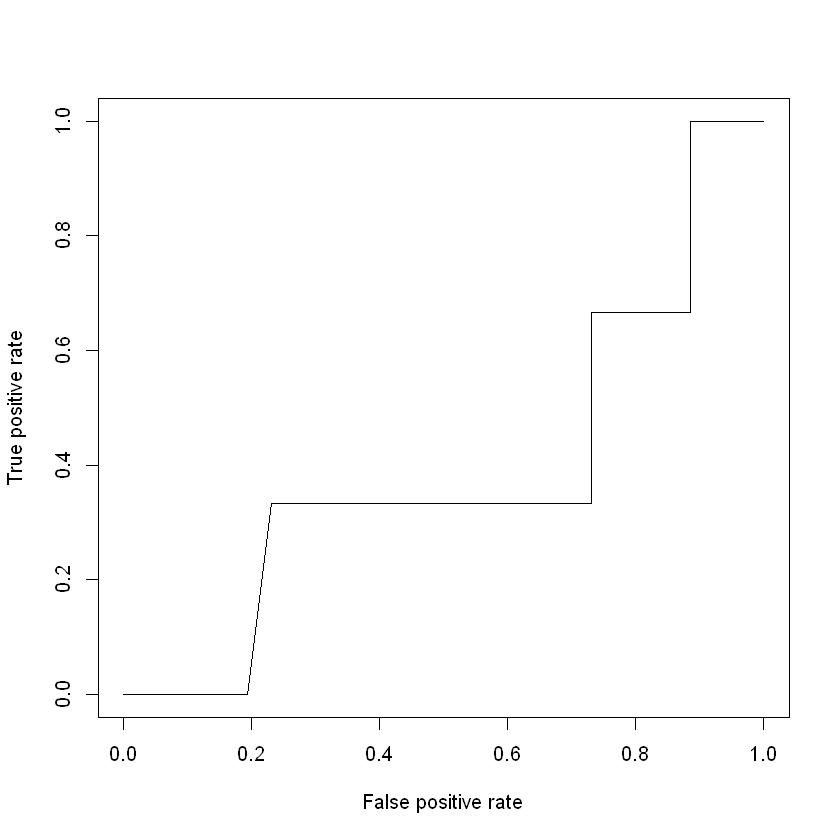

In [15]:
model <- glm(t1_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.98357  -0.57206  -0.47314  -0.00014   2.41768  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)         -1.2397     1.7321  -0.716    0.474
sexMale              0.6848     0.9892   0.692    0.489
definitionharmony    0.3749     1.2480   0.300    0.764
needharmony         -0.1032     0.8586  -0.120    0.904
purposecosmetic    -16.4673  1860.3691  -0.009    0.993
purposeetc           0.1675     1.0811   0.155    0.877
interest            -0.3590     0.3383  -1.061    0.289

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 52.867  on 66  degrees of freedom
Residual deviance: 46.186  on 60  degrees of freedom
AIC: 60.186

Number of Fisher Scoring iterations: 17


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,52.86738,NA
sex,1,2.61813729,65,50.24924,0.1056484
definition,1,0.42385117,64,49.82539,0.5150216
need,1,0.01364007,63,49.81175,0.9070259
purpose,2,2.45074373,61,47.36101,0.2936485
interest,1,1.17520356,60,46.18580,0.2783346


[1] 0.5208333

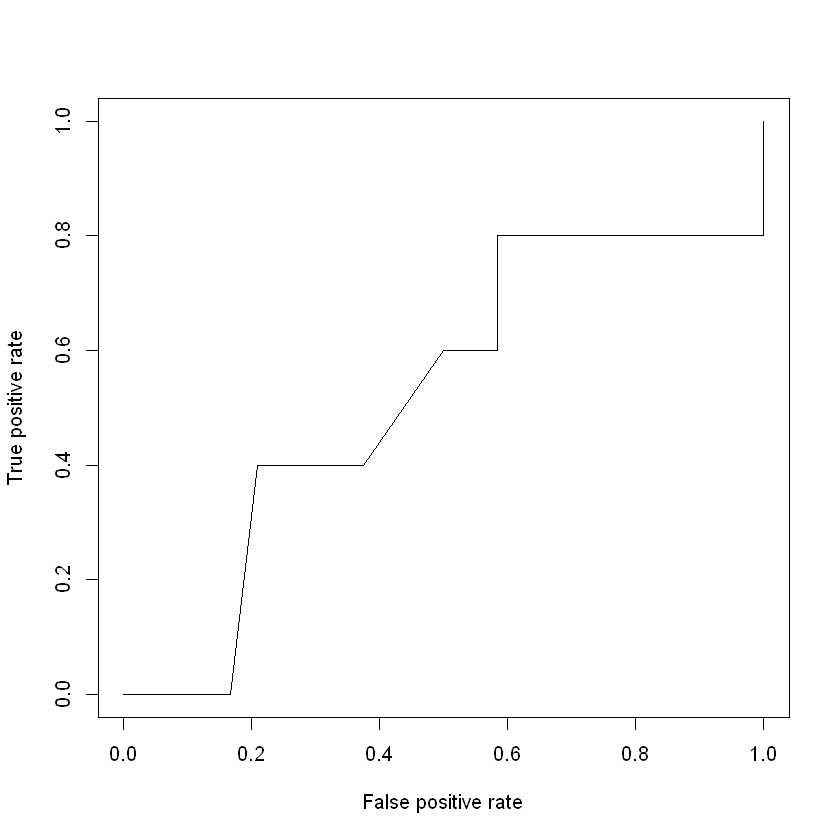

In [16]:
model <- glm(t1_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2032  -0.7441  -0.5660   0.3366   2.2101  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.990593   1.227750  -0.807    0.420
sexMale           -0.944546   0.804730  -1.174    0.240
definitionharmony -0.106139   0.820437  -0.129    0.897
needharmony        0.477147   0.720954   0.662    0.508
purposecosmetic    0.005733   0.883934   0.006    0.995
purposeetc         0.866205   0.788421   1.099    0.272
interest          -0.062005   0.273004  -0.227    0.820

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.897  on 66  degrees of freedom
Residual deviance: 70.437  on 60  degrees of freedom
AIC: 84.437

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,75.89726,NA
sex,1,3.28263781,65,72.61462,0.07001631
definition,1,0.26333198,64,72.35129,0.60784023
need,1,0.40588114,63,71.94541,0.52406751
purpose,2,1.45637848,61,70.48903,0.48278240
interest,1,0.05162331,60,70.43740,0.82026230


[1] 0.5441176

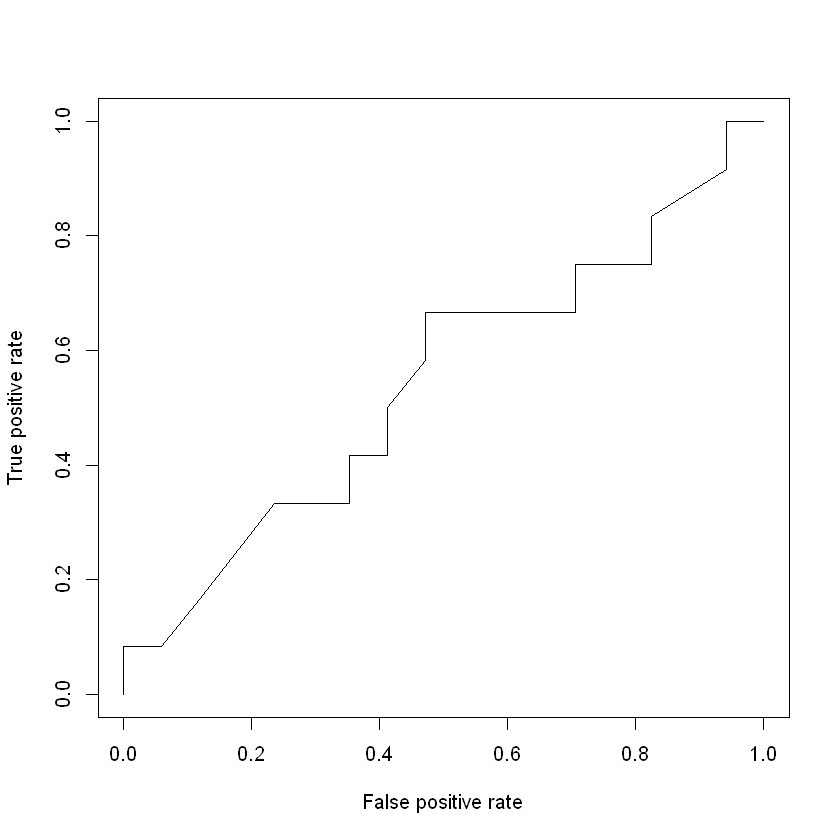

In [17]:
model <- glm(t1_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9353  -0.6611  -0.4800  -0.4178   2.1179  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.7727     1.3826  -1.282    0.200
sexMale            -0.5308     0.9291  -0.571    0.568
definitionharmony  -0.8588     0.9207  -0.933    0.351
needharmony         0.6353     0.8869   0.716    0.474
purposecosmetic     0.5116     0.9386   0.545    0.586
purposeetc          0.1901     0.9782   0.194    0.846
interest            0.1321     0.3220   0.410    0.682

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.836  on 66  degrees of freedom
Residual deviance: 57.175  on 60  degrees of freedom
AIC: 71.175

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,59.83573,NA
sex,1,1.1882010,65,58.64752,0.2756927
definition,1,0.5870211,64,58.06050,0.4435734
need,1,0.4298919,63,57.63061,0.5120420
purpose,2,0.2855626,61,57.34505,0.8669436
interest,1,0.1699540,60,57.17510,0.6801527


[1] 0.9679487

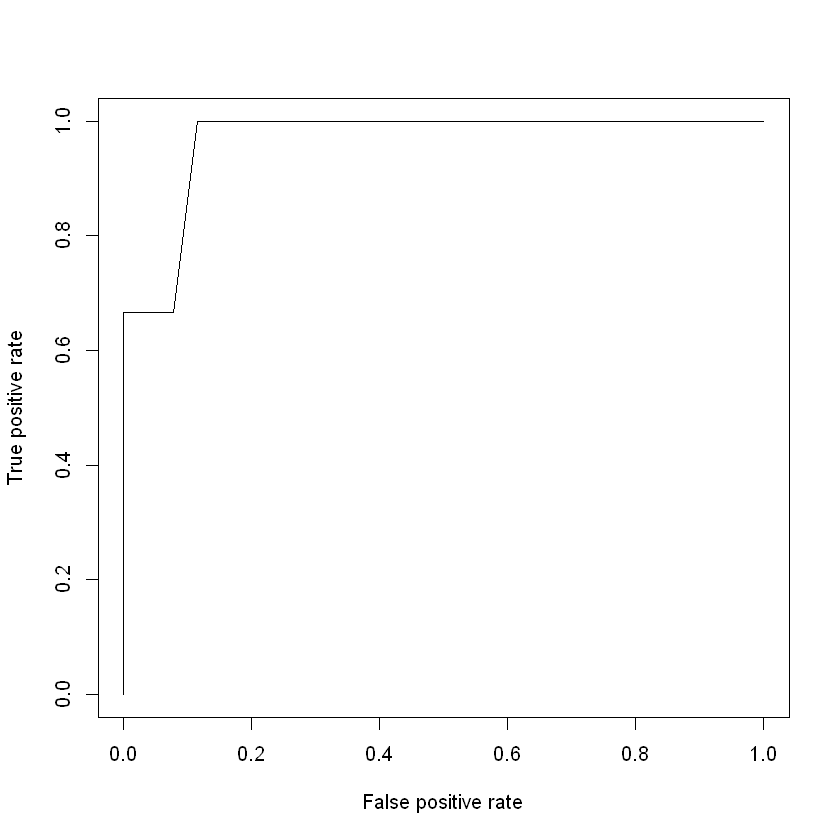

In [18]:
model <- glm(t1_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4579  -1.0036  -0.6563   1.2661   2.0070  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.8329     1.0728  -0.776    0.438
sexMale             0.5826     0.6900   0.844    0.399
definitionharmony   0.3219     0.7296   0.441    0.659
needharmony        -0.6532     0.6348  -1.029    0.303
purposecosmetic     0.1647     0.7816   0.211    0.833
purposeetc         -1.0468     0.8532  -1.227    0.220
interest            0.1134     0.2397   0.473    0.636

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 88.521  on 66  degrees of freedom
Residual deviance: 83.305  on 60  degrees of freedom
AIC: 97.305

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,88.52077,NA
sex,1,1.7026505,65,86.81812,0.1919417
definition,1,0.1456183,64,86.67250,0.7027583
need,1,1.0495321,63,85.62297,0.3056149
purpose,2,2.0927705,61,83.53020,0.3512050
interest,1,0.2256532,60,83.30455,0.6347658


[1] 0.3876812

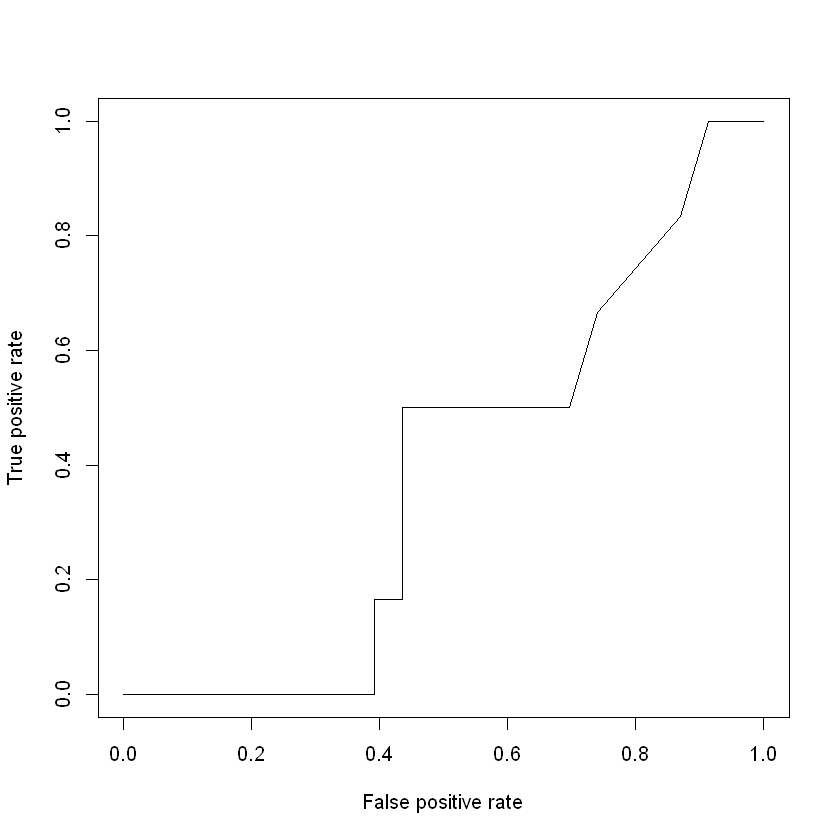

In [19]:
model <- glm(t1_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = t2_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.32416  -0.23385  -0.13466  -0.00004   2.68810  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -25.9066  3696.3855  -0.007   0.9944  
sexMale              1.0868     2.5757   0.422   0.6731  
definitionharmony   18.4295  3696.3837   0.005   0.9960  
needharmony          0.0262     1.2145   0.022   0.9828  
purposecosmetic    -16.2654  4229.1376  -0.004   0.9969  
purposeetc           3.1586     2.5317   1.248   0.2122  
interest             0.9262     0.5289   1.751   0.0799 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 35.570  on 66  degrees of freedom
Residual deviance: 21.173  on 60  degrees of freedom
AIC: 35.173

Number of Fisher Scoring iterations: 19


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,35.56977,NA
sex,1,1.14841712,65,34.42135,0.28388075
definition,1,3.69934638,64,30.72200,0.05443379
need,1,0.07035072,63,30.65165,0.79082682
purpose,2,5.81805448,61,24.83360,0.05452875
interest,1,3.66025400,60,21.17335,0.05572514


[1] 0.1574074

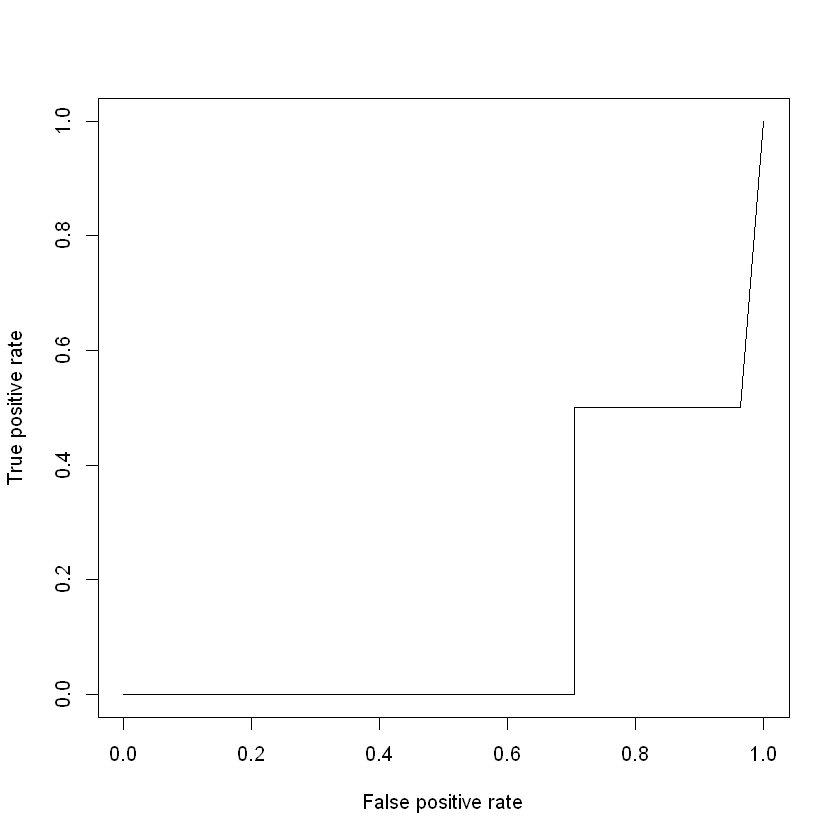

In [20]:
model <- glm(t2_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.49177  -0.53759  -0.25639  -0.00011   2.26214  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -0.55802    1.76469  -0.316   0.7518  
sexMale              1.12590    0.97909   1.150   0.2502  
definitionharmony   -0.08564    1.29728  -0.066   0.9474  
needharmony          0.92075    0.95805   0.961   0.3365  
purposecosmetic    -16.54051 1778.84979  -0.009   0.9926  
purposeetc          -0.86131    1.32488  -0.650   0.5156  
interest            -0.68879    0.36869  -1.868   0.0617 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 59.836  on 66  degrees of freedom
Residual deviance: 43.062  on 60  degrees of freedom
AIC: 57.062

Number of Fisher Scoring iterati

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,59.83573,NA
sex,1,8.8937025,65,50.94202,0.002861559
definition,1,0.4282970,64,50.51373,0.512825752
need,1,0.8644098,63,49.64932,0.352507584
purpose,2,2.5461355,61,47.10318,0.279971424
interest,1,4.0411691,60,43.06201,0.044403050


[1] 0.537037

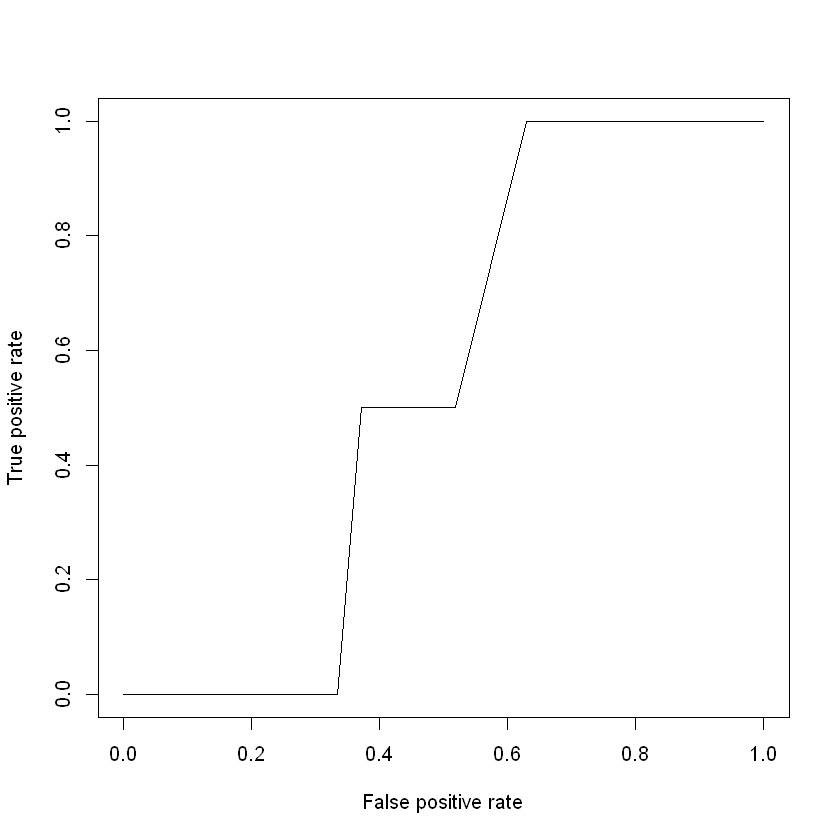

In [21]:
model <- glm(t2_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3536  -0.8829  -0.7196   1.3049   2.0497  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.5505     1.0913  -0.504    0.614
sexMale             0.2497     0.7070   0.353    0.724
definitionharmony  -0.9797     0.7577  -1.293    0.196
needharmony         0.3948     0.6836   0.578    0.564
purposecosmetic    -0.1106     0.8092  -0.137    0.891
purposeetc         -0.7511     0.8606  -0.873    0.383
interest            0.1037     0.2489   0.417    0.677

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.324  on 66  degrees of freedom
Residual deviance: 79.554  on 60  degrees of freedom
AIC: 93.554

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,83.32386,NA
sex,1,0.4248329,65,82.89903,0.5145353
definition,1,2.0872325,64,80.81179,0.1485349
need,1,0.3392195,63,80.47258,0.5602801
purpose,2,0.7434906,61,79.72908,0.6895298
interest,1,0.1747016,60,79.55438,0.6759667


[1] 0.5220588

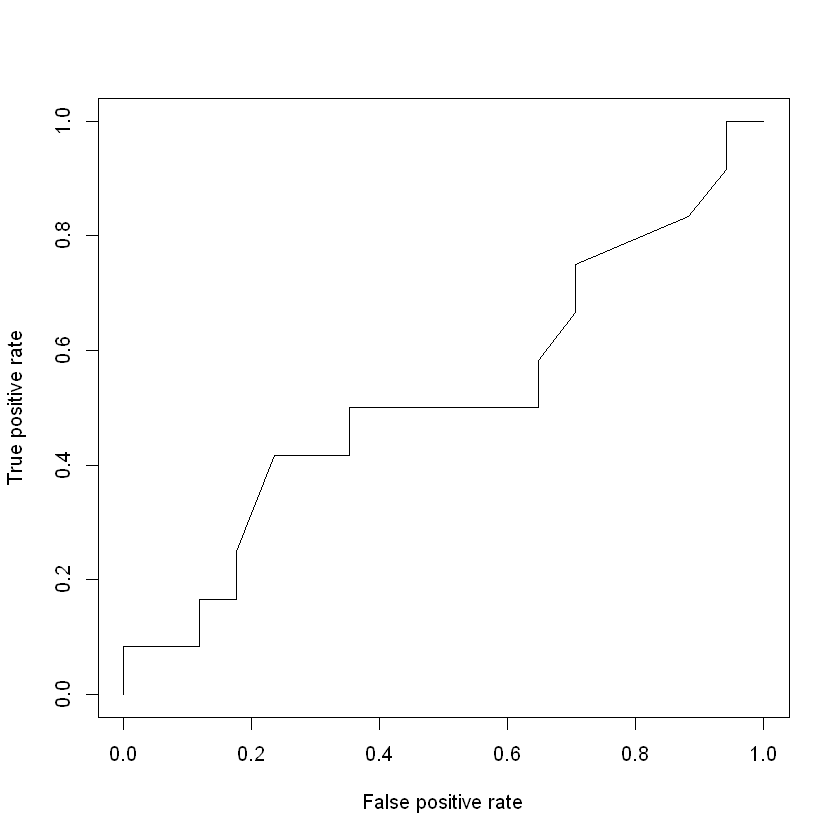

In [22]:
model <- glm(t2_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3275  -0.8915  -0.6747   1.3008   1.8748  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.87182    1.11410  -0.783    0.434
sexMale           -0.96222    0.72616  -1.325    0.185
definitionharmony  0.71364    0.75959   0.940    0.347
needharmony       -0.54976    0.63809  -0.862    0.389
purposecosmetic    0.09621    0.78789   0.122    0.903
purposeetc        -0.57009    0.79747  -0.715    0.475
interest           0.10204    0.25213   0.405    0.686

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.324  on 66  degrees of freedom
Residual deviance: 79.338  on 60  degrees of freedom
AIC: 93.338

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,83.32386,NA
sex,1,2.2576706,65,81.06619,0.1329539
definition,1,0.1674071,64,80.89878,0.6824265
need,1,0.7573575,63,80.14142,0.3841567
purpose,2,0.6388835,61,79.50254,0.7265545
interest,1,0.1644168,60,79.33812,0.6851222


[1] 0.4675325

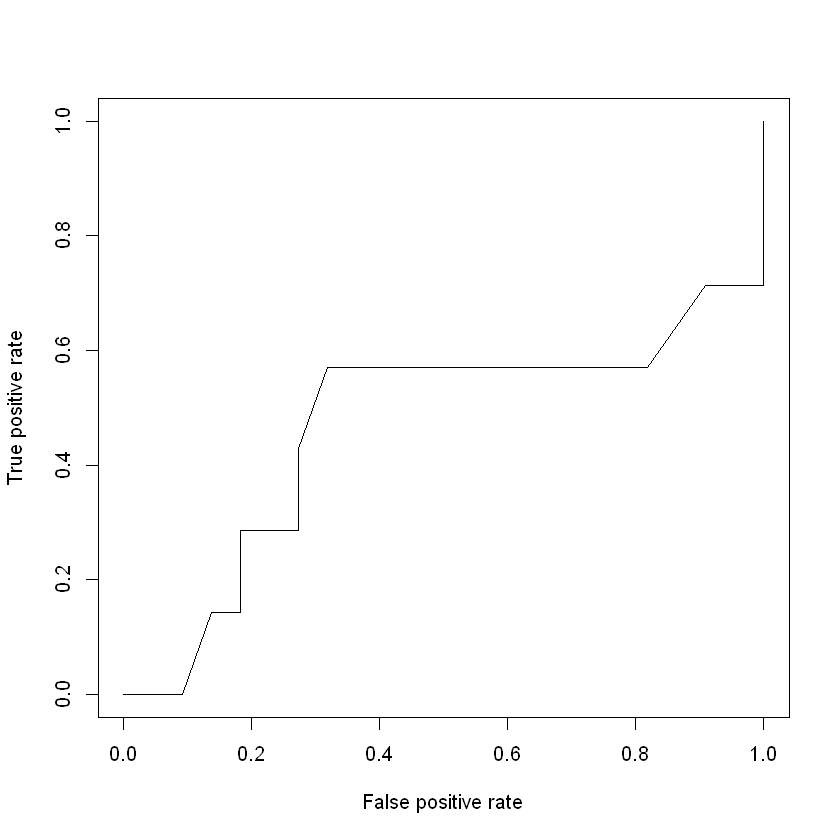

In [23]:
model <- glm(t2_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8468  -0.6162  -0.4116  -0.3496   2.2433  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.68486    1.53101  -1.100    0.271
sexMale           -0.33855    1.09862  -0.308    0.758
definitionharmony -0.22962    0.97671  -0.235    0.814
needharmony       -0.24327    0.90212  -0.270    0.787
purposecosmetic    1.11212    1.05863   1.051    0.293
purposeetc         0.86115    1.07434   0.802    0.423
interest          -0.08946    0.34214  -0.261    0.794

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 52.867  on 66  degrees of freedom
Residual deviance: 49.617  on 60  degrees of freedom
AIC: 63.617

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,52.86738,NA
sex,1,1.74956698,65,51.11781,0.1859312
definition,1,0.13722158,64,50.98059,0.7110589
need,1,0.07351167,63,50.90708,0.7862908
purpose,2,1.22172840,61,49.68535,0.5428815
interest,1,0.06837537,60,49.61698,0.7937171


[1] 0.5253623

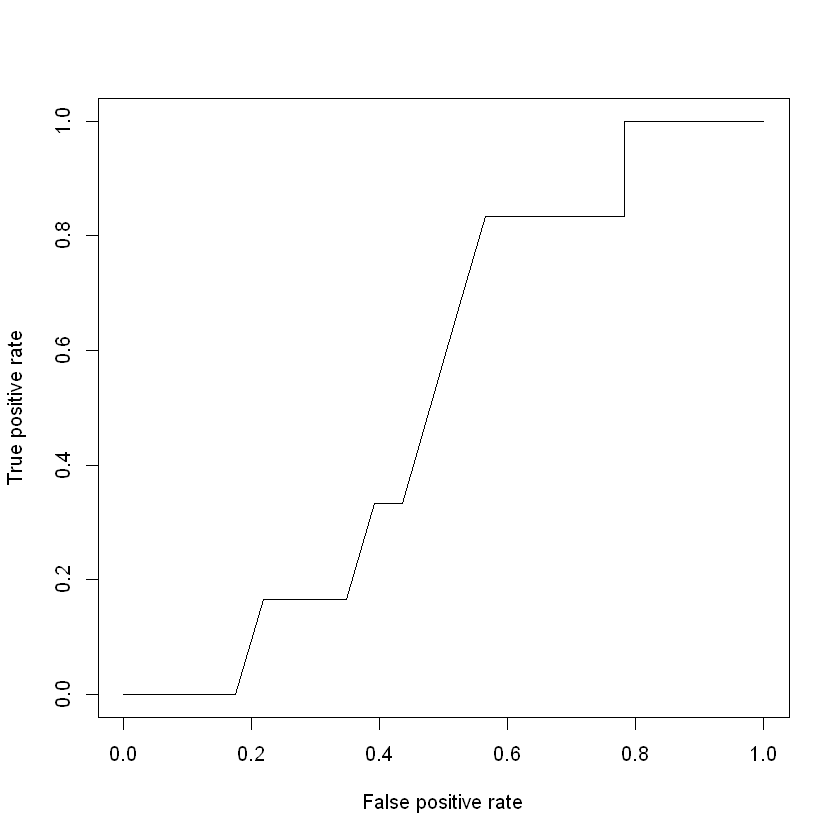

In [24]:
model <- glm(t2_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9638  -0.5234  -0.4021  -0.2614   2.4466  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -3.92840    1.78800  -2.197    0.028 *
sexMale           -1.00717    0.97635  -1.032    0.302  
definitionharmony  0.83717    1.30227   0.643    0.520  
needharmony        1.02297    1.03322   0.990    0.322  
purposecosmetic    0.06812    1.03175   0.066    0.947  
purposeetc        -1.56310    1.33573  -1.170    0.242  
interest           0.38565    0.38277   1.008    0.314  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49.008  on 66  degrees of freedom
Residual deviance: 44.641  on 60  degrees of freedom
AIC: 58.641

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,49.00833,NA
sex,1,0.06942676,65,48.93890,0.7921733
definition,1,0.89722680,64,48.04167,0.3435264
need,1,0.90105074,63,47.14062,0.3425001
purpose,2,1.42823961,61,45.71238,0.4896229
interest,1,1.07144620,60,44.64094,0.3006190


[1] 0.3425926

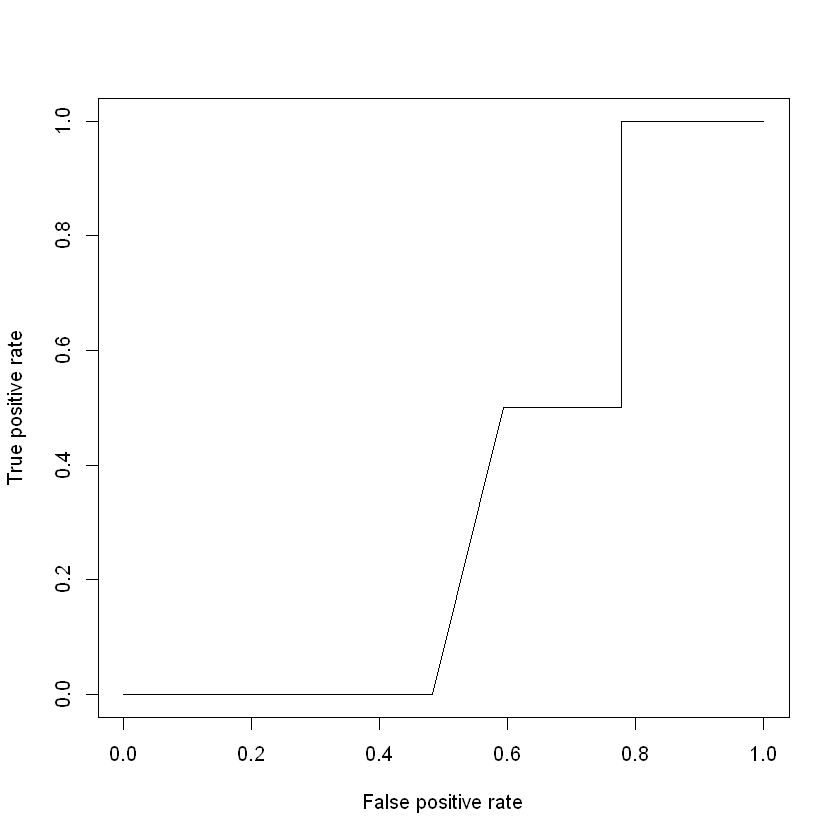

In [25]:
model <- glm(d1_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4815  -0.9148  -0.7155   1.2339   1.7404  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         1.2245     1.1279   1.086    0.278
sexMale            -0.4991     0.6939  -0.719    0.472
definitionharmony  -0.2972     0.7165  -0.415    0.678
needharmony        -0.5496     0.6285  -0.875    0.382
purposecosmetic    -0.6846     0.8229  -0.832    0.405
purposeetc         -0.8439     0.7928  -1.064    0.287
interest           -0.2666     0.2506  -1.064    0.287

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.187  on 66  degrees of freedom
Residual deviance: 82.002  on 60  degrees of freedom
AIC: 96.002

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,86.18739,NA
sex,1,0.1022484,65,86.08514,0.7491480
definition,1,0.7133216,64,85.37182,0.3983433
need,1,0.4958610,63,84.87596,0.4813244
purpose,2,1.7161374,61,83.15982,0.4239801
interest,1,1.1580611,60,82.00176,0.2818680


[1] 0.7555556

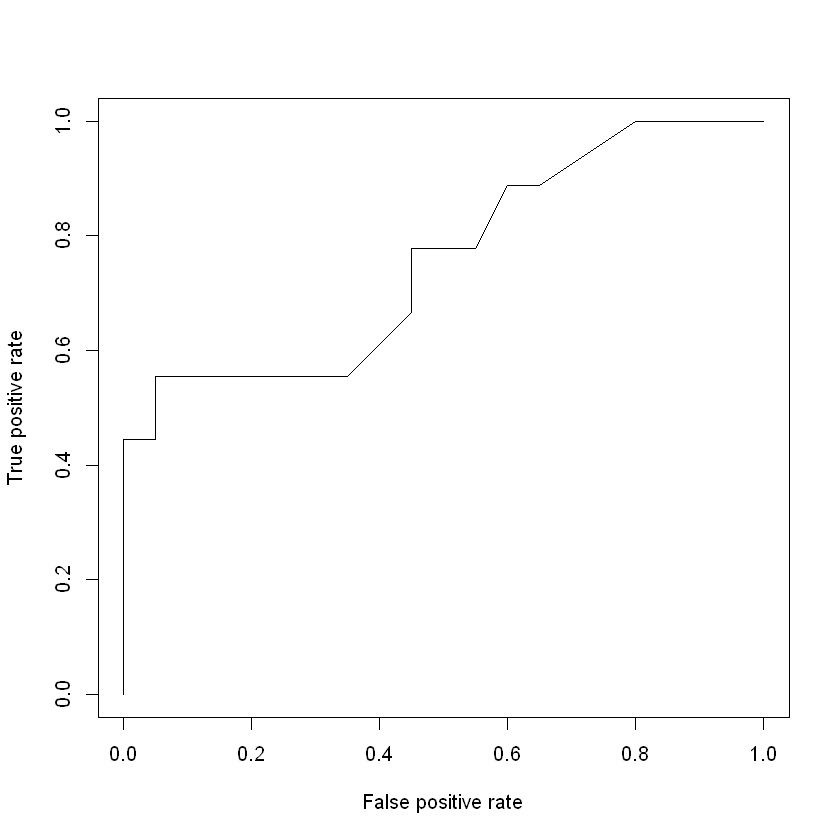

In [26]:
model <- glm(d1_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.95017  -0.57565  -0.36681  -0.00013   2.07400  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -4.6808     2.3142  -2.023   0.0431 *
sexMale              2.1923     1.4999   1.462   0.1438  
definitionharmony    0.9336     1.2709   0.735   0.4626  
needharmony         -1.0132     0.8953  -1.132   0.2577  
purposecosmetic    -15.4352  1755.9130  -0.009   0.9930  
purposeetc           1.7363     1.4130   1.229   0.2191  
interest             0.2705     0.3469   0.780   0.4356  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49.008  on 66  degrees of freedom
Residual deviance: 41.085  on 60  degrees of freedom
AIC: 55.085

Number of Fisher Scoring iterations: 17


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,49.00833,NA
sex,1,1.5792173,65,47.42911,0.2088735
definition,1,0.3082480,64,47.12086,0.5787573
need,1,1.3762688,63,45.74459,0.2407377
purpose,2,4.0444187,61,41.70018,0.1323627
interest,1,0.6155506,60,41.08462,0.4327055


[1] 0.6602564

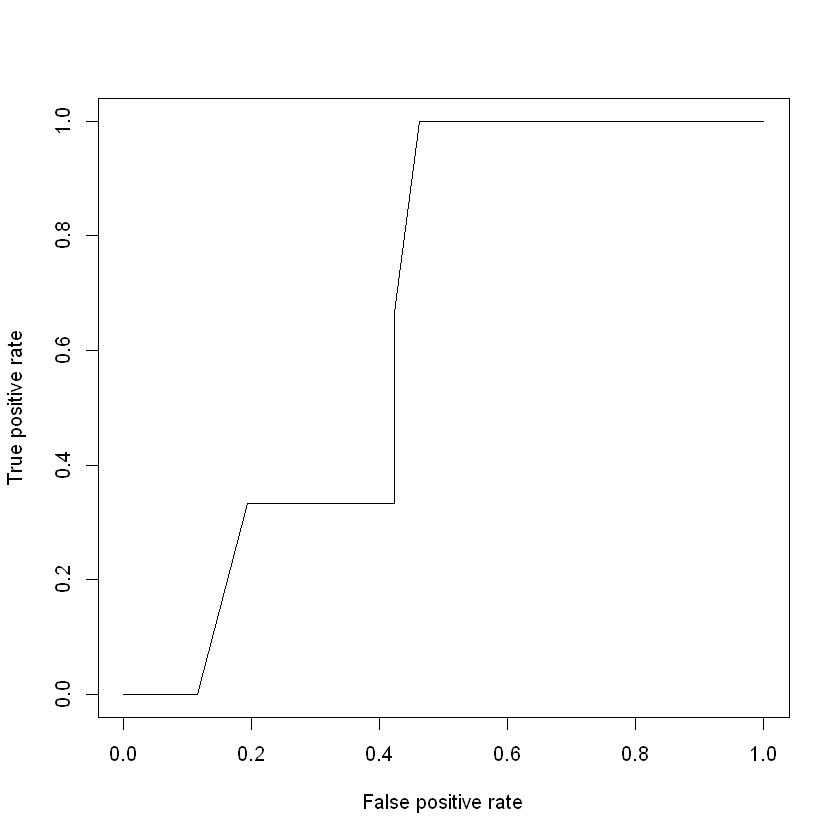

In [27]:
model <- glm(d1_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0203  -0.8270  -0.6831   0.3266   1.8809  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.85241    1.22988  -1.506    0.132
sexMale            0.63907    0.80278   0.796    0.426
definitionharmony  0.15806    0.85215   0.185    0.853
needharmony        0.29479    0.69476   0.424    0.671
purposecosmetic    0.60702    0.92339   0.657    0.511
purposeetc         0.89864    0.86961   1.033    0.301
interest          -0.04558    0.25199  -0.181    0.856

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.897  on 66  degrees of freedom
Residual deviance: 73.950  on 60  degrees of freedom
AIC: 87.95

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,75.89726,NA
sex,1,0.25823669,65,75.63902,0.6113342
definition,1,0.36503405,64,75.27399,0.5457237
need,1,0.17885197,63,75.09513,0.6723617
purpose,2,1.11252937,61,73.98260,0.5733467
interest,1,0.03273954,60,73.94987,0.8564141


[1] 0.7132353

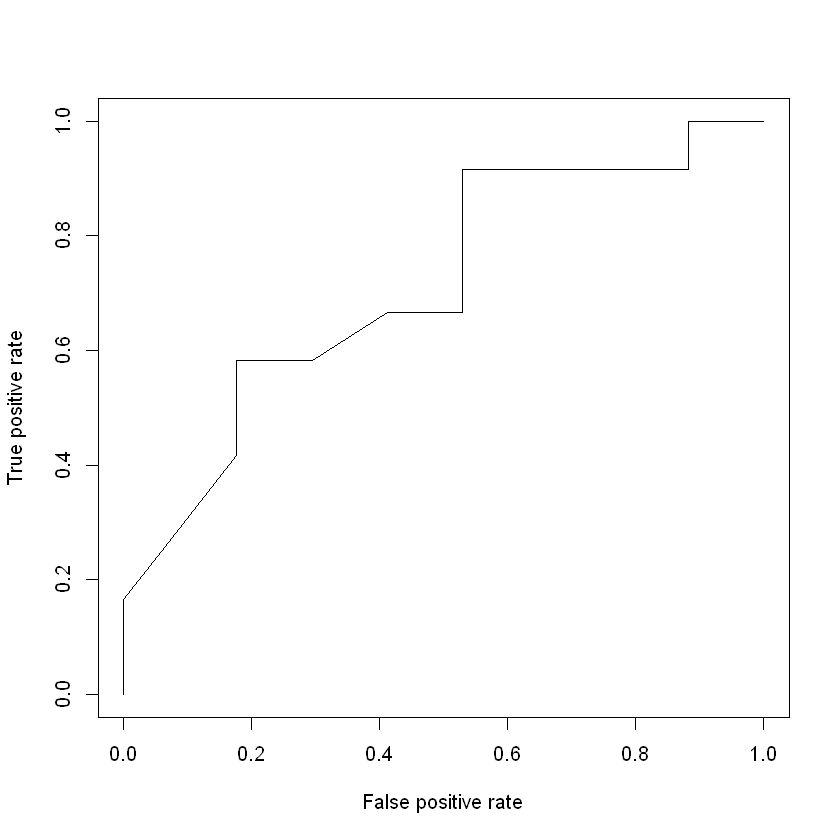

In [28]:
model <- glm(d1_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0292  -0.4645  -0.3529  -0.2319   2.2617  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -5.1156     2.0645  -2.478   0.0132 *
sexMale             0.1279     1.1533   0.111   0.9117  
definitionharmony   1.0987     1.3104   0.838   0.4018  
needharmony        -0.6140     1.0280  -0.597   0.5503  
purposecosmetic    -0.2322     1.3194  -0.176   0.8603  
purposeetc         -1.0800     1.4727  -0.733   0.4633  
interest            0.7060     0.4456   1.584   0.1131  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 40.401  on 66  degrees of freedom
Residual deviance: 36.535  on 60  degrees of freedom
AIC: 50.535

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,40.40109,NA
sex,1,0.1803272,65,40.22076,0.67109216
definition,1,0.1250170,64,40.09574,0.72365554
need,1,0.5146654,63,39.58108,0.47312617
purpose,2,0.1592705,61,39.42181,0.92345309
interest,1,2.8863971,60,36.53541,0.08933049


[1] 0.4537037

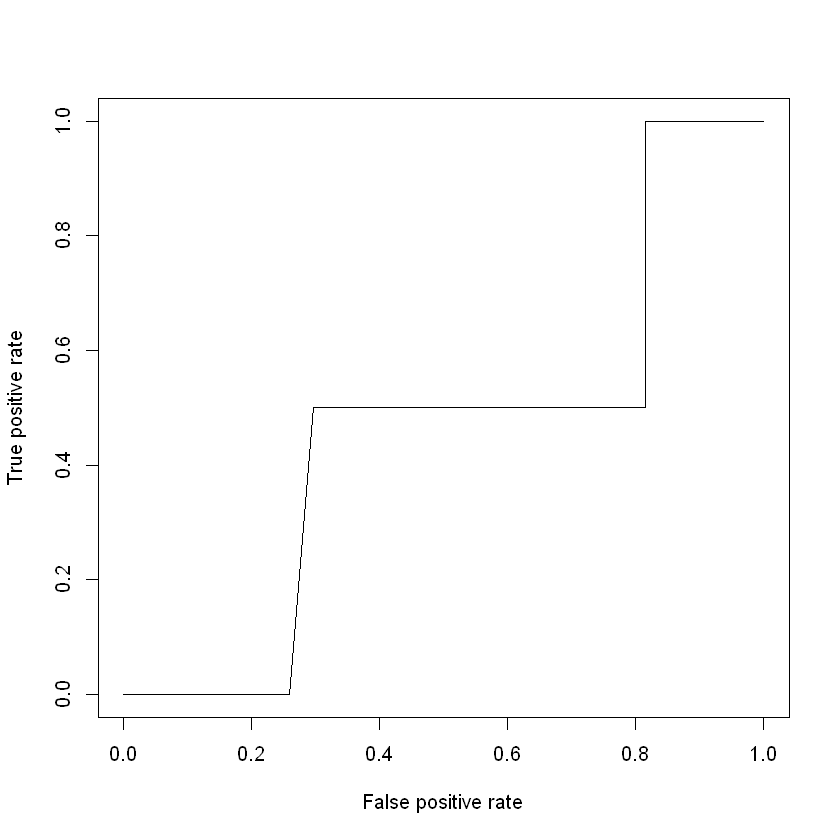

In [29]:
model <- glm(d2_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3688  -1.0767  -0.6448   1.1232   1.8834  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -1.78692    1.13037  -1.581   0.1139  
sexMale           -0.21176    0.69551  -0.304   0.7608  
definitionharmony  0.04709    0.79751   0.059   0.9529  
needharmony        1.55347    0.68372   2.272   0.0231 *
purposecosmetic   -0.14746    0.83077  -0.178   0.8591  
purposeetc        -0.16060    0.78451  -0.205   0.8378  
interest           0.15644    0.24119   0.649   0.5166  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 89.495  on 66  degrees of freedom
Residual deviance: 81.608  on 60  degrees of freedom
AIC: 95.608

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,89.49488,NA
sex,1,0.3316158,65,89.16327,0.56470921
definition,1,1.4917753,64,87.67149,0.22194122
need,1,5.6068490,63,82.06464,0.01789041
purpose,2,0.0312564,61,82.03339,0.98449329
interest,1,0.4249521,60,81.60843,0.51447633


[1] 0.3694444

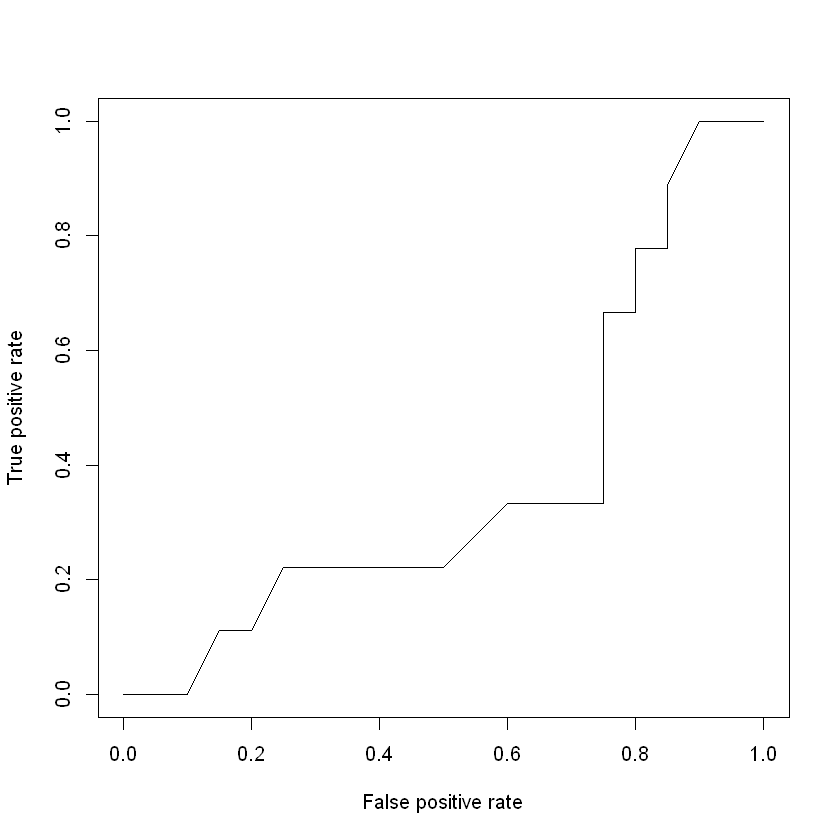

In [30]:
model <- glm(d2_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3747  -0.6350  -0.4466  -0.2849   2.1702  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -0.7285     1.4766  -0.493   0.6217  
sexMale            -0.1025     0.9597  -0.107   0.9149  
definitionharmony   1.1071     1.0487   1.056   0.2911  
needharmony        -0.8216     0.7781  -1.056   0.2910  
purposecosmetic     1.4656     1.0161   1.442   0.1492  
purposeetc          0.6538     1.0046   0.651   0.5152  
interest           -0.5699     0.3210  -1.775   0.0758 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 62.984  on 66  degrees of freedom
Residual deviance: 55.379  on 60  degrees of freedom
AIC: 69.379

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,62.98440,NA
sex,1,0.4383502,65,62.54605,0.5079198
definition,1,0.7382536,64,61.80780,0.3902209
need,1,0.6167415,63,61.19106,0.4322608
purpose,2,2.3357653,61,58.85529,0.3110248
interest,1,3.4764034,60,55.37889,0.0622499


[1] 0.3083333

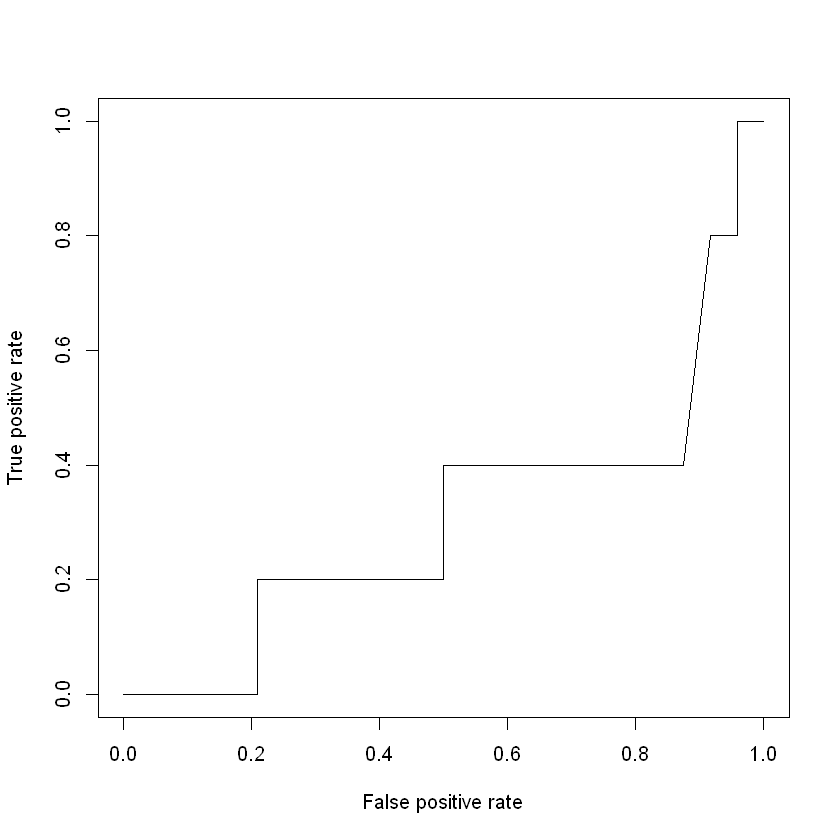

In [31]:
model <- glm(d2_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2544  -0.7690  -0.5748   0.3915   2.1543  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.5038     1.2255   0.411    0.681
sexMale            -0.8219     0.7671  -1.072    0.284
definitionharmony  -0.4963     0.7570  -0.656    0.512
needharmony        -0.6171     0.6800  -0.907    0.364
purposecosmetic    -1.2829     0.9756  -1.315    0.189
purposeetc         -0.1772     0.8007  -0.221    0.825
interest           -0.1082     0.2789  -0.388    0.698

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.897  on 66  degrees of freedom
Residual deviance: 70.694  on 60  degrees of freedom
AIC: 84.694

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,75.89726,NA
sex,1,1.4760592,65,74.42120,0.2243921
definition,1,0.9252659,64,73.49593,0.3360961
need,1,0.6851309,63,72.81080,0.4078255
purpose,2,1.9661420,61,70.84466,0.3741603
interest,1,0.1510400,60,70.69362,0.6975435


[1] 0.6138889

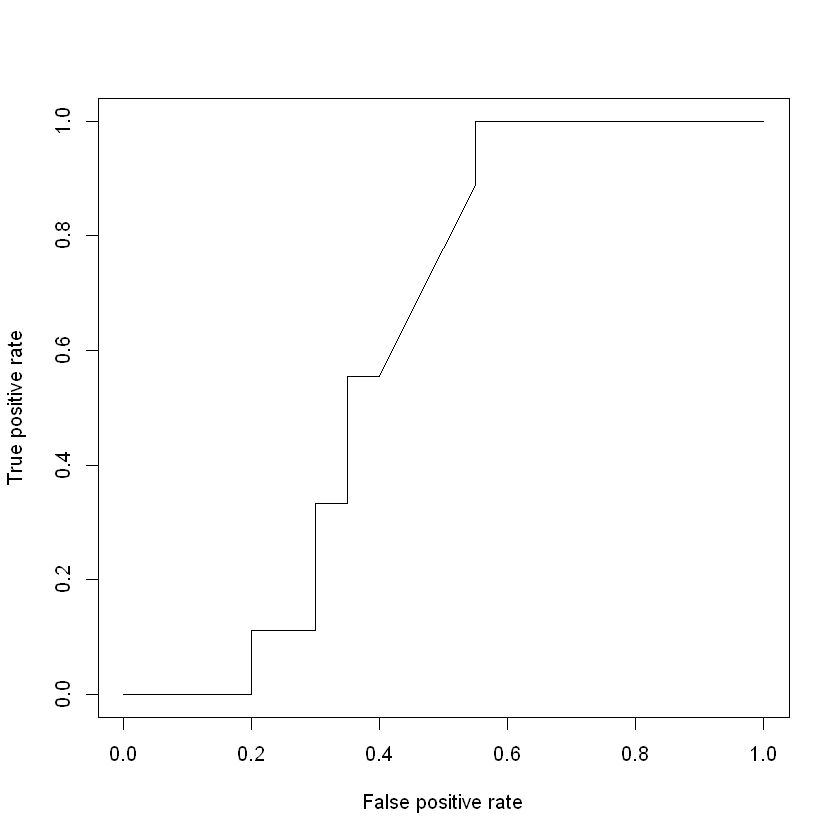

In [32]:
model <- glm(d2_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3173  -0.3800  -0.3578  -0.1522   2.3168  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.78927    2.00220  -1.393   0.1636  
sexMale            2.96706    1.63404   1.816   0.0694 .
definitionharmony -1.66295    1.18919  -1.398   0.1620  
needharmony       -1.23681    1.15446  -1.071   0.2840  
purposecosmetic    0.91437    1.60449   0.570   0.5688  
purposeetc         1.12741    1.62746   0.693   0.4885  
interest           0.03631    0.40068   0.091   0.9278  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 40.401  on 66  degrees of freedom
Residual deviance: 33.016  on 60  degrees of freedom
AIC: 47.016

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,40.40109,NA
sex,1,1.657277974,65,38.74381,0.19797125
definition,1,4.071256778,64,34.67255,0.04361881
need,1,1.090895750,63,33.58166,0.29627282
purpose,2,0.557012291,61,33.02464,0.75691362
interest,1,0.008207114,60,33.01644,0.92781589


[1] 0.345

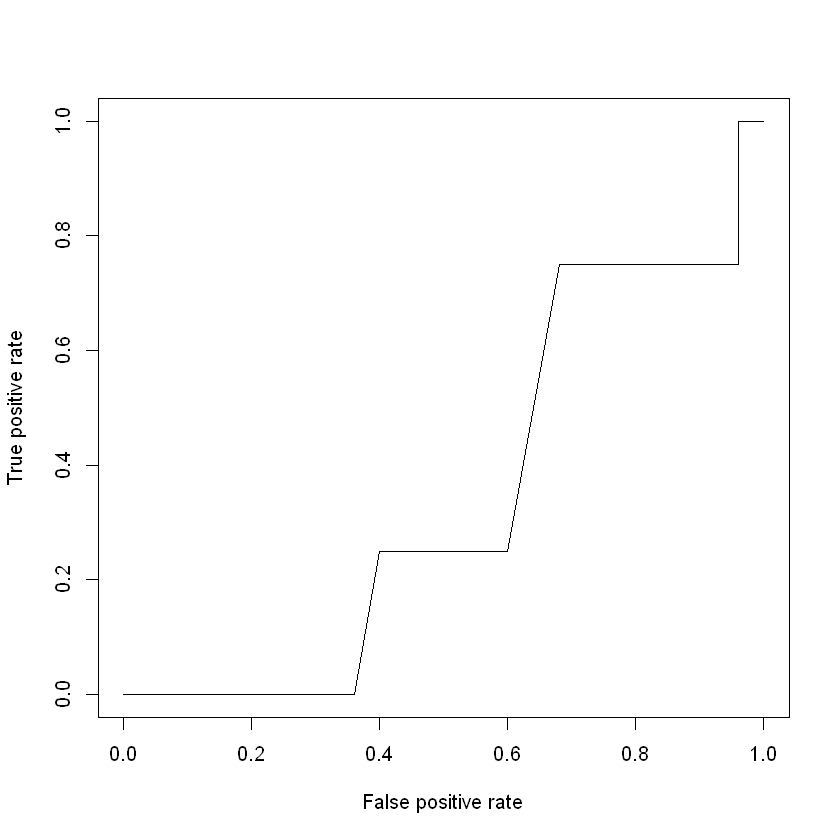

In [33]:
model <- glm(d2_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6351  -0.7786  -0.5500   0.8985   2.4714  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -0.04217    1.19628  -0.035   0.9719  
sexMale           -0.50871    0.75654  -0.672   0.5013  
definitionharmony -0.85390    0.73893  -1.156   0.2479  
needharmony       -0.90864    0.69287  -1.311   0.1897  
purposecosmetic   -0.34955    0.84484  -0.414   0.6791  
purposeetc        -2.05511    1.02824  -1.999   0.0456 *
interest           0.28476    0.29230   0.974   0.3299  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 81.686  on 66  degrees of freedom
Residual deviance: 68.341  on 60  degrees of freedom
AIC: 82.341

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,81.68565,NA
sex,1,0.5467723,65,81.13887,0.45963955
definition,1,6.0289587,64,75.10991,0.01407303
need,1,1.5986593,63,73.51126,0.20609331
purpose,2,4.1910915,61,69.32016,0.12300310
interest,1,0.9796115,60,68.34055,0.32229474


[1] 0.5

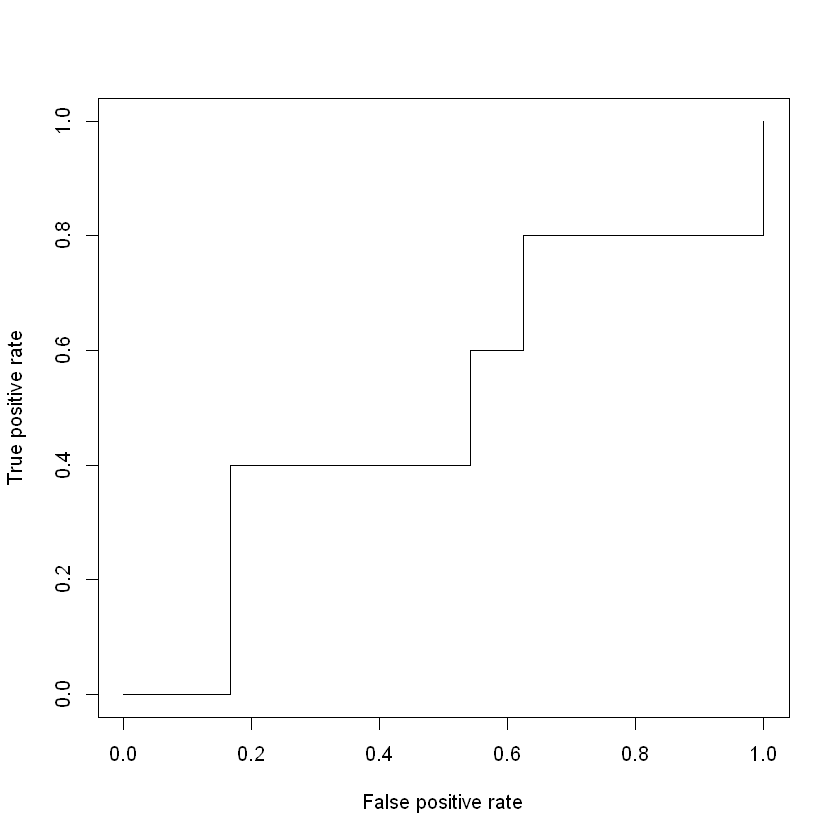

In [34]:
model <- glm(d3_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9452  -0.5009  -0.4128  -0.2927   2.2696  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -3.9097     1.7930  -2.181   0.0292 *
sexMale            -0.8566     1.0929  -0.784   0.4331  
definitionharmony   0.5075     1.3287   0.382   0.7025  
needharmony         1.2025     1.0552   1.140   0.2544  
purposecosmetic     0.7362     1.1240   0.655   0.5125  
purposeetc          0.5649     1.1089   0.509   0.6105  
interest            0.2121     0.3641   0.583   0.5602  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49.008  on 66  degrees of freedom
Residual deviance: 44.447  on 60  degrees of freedom
AIC: 58.447

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,49.00833,NA
sex,1,1.1112884,65,47.89704,0.2918021
definition,1,1.2840045,64,46.61304,0.2571558
need,1,1.2476135,63,45.36542,0.2640088
purpose,2,0.5718062,61,44.79362,0.7513354
interest,1,0.3470036,60,44.44661,0.5558142


[1] 0.5227273

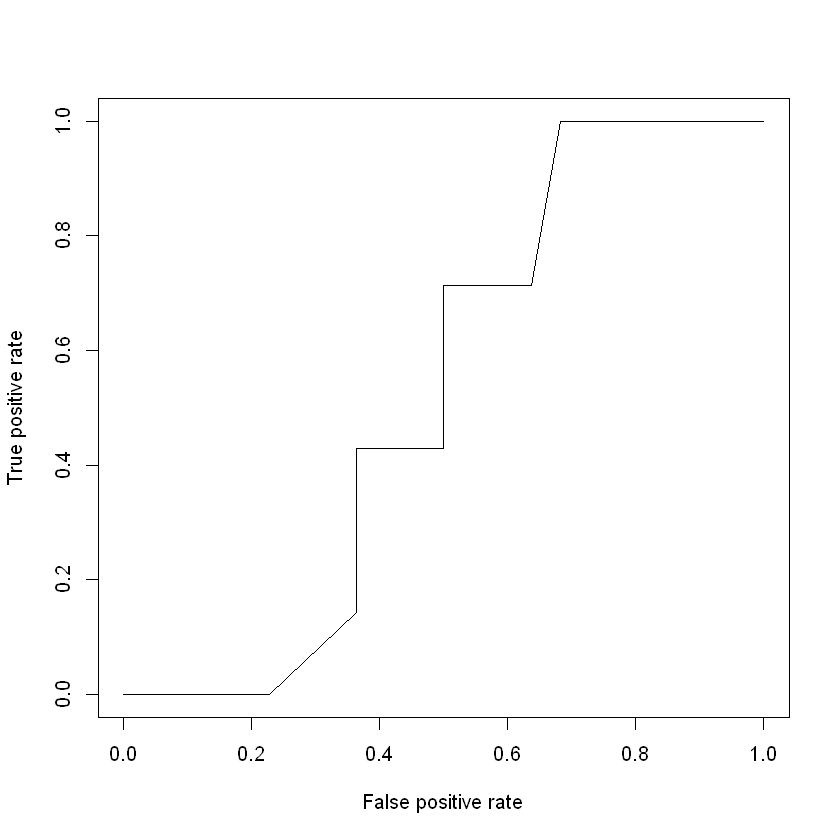

In [35]:
model <- glm(d3_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0243  -0.7412  -0.5133  -0.2928   2.5423  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -2.1884     1.5676  -1.396    0.163
sexMale             0.6255     0.8876   0.705    0.481
definitionharmony   1.3748     1.1808   1.164    0.244
needharmony        -0.4135     0.7223  -0.572    0.567
purposecosmetic    -0.4533     1.2638  -0.359    0.720
purposeetc          0.7137     0.9376   0.761    0.447
interest           -0.1833     0.2785  -0.658    0.510

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.930  on 66  degrees of freedom
Residual deviance: 60.975  on 60  degrees of freedom
AIC: 74.975

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,65.92985,NA
sex,1,0.9518869,65,64.97796,0.3292395
definition,1,2.2001899,64,62.77777,0.1379937
need,1,0.3107643,63,62.46701,0.5772116
purpose,2,1.0532632,61,61.41375,0.5905910
interest,1,0.4387283,60,60.97502,0.5077369


[1] 0.237013

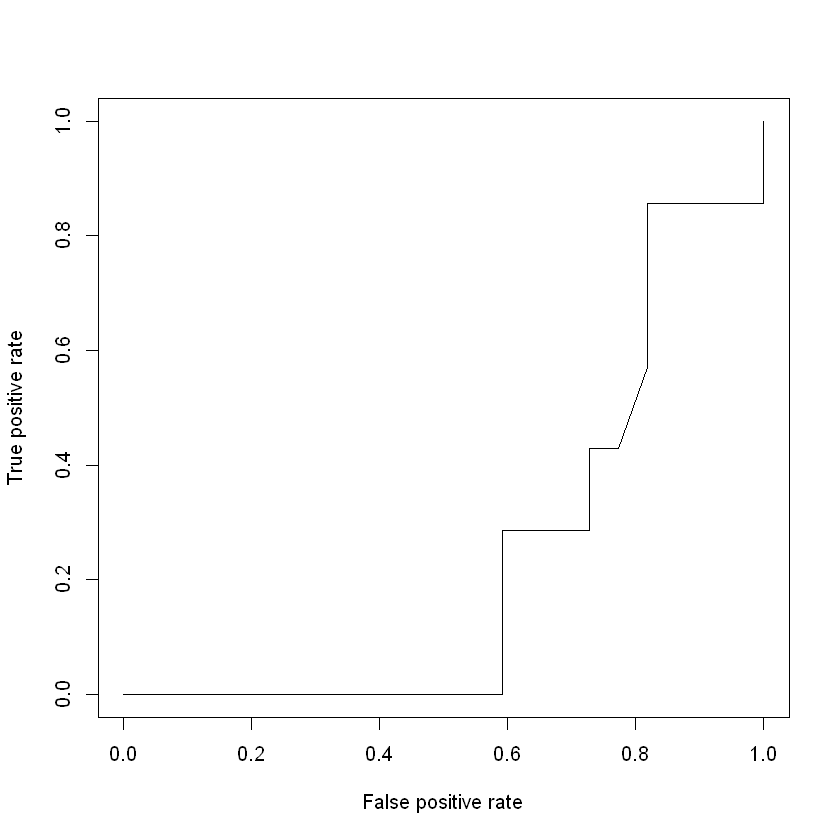

In [36]:
model <- glm(d3_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.07756  -0.54313  -0.27310  -0.00008   1.99340  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -5.0092     2.4585  -2.038   0.0416 *
sexMale              1.9929     1.5255   1.306   0.1914  
definitionharmony   -1.5999     1.2722  -1.258   0.2085  
needharmony          1.4310     1.2780   1.120   0.2628  
purposecosmetic    -16.4238  2808.5481  -0.006   0.9953  
purposeetc           2.1583     1.4647   1.473   0.1406  
interest             0.4486     0.4110   1.091   0.2751  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 44.865  on 66  degrees of freedom
Residual deviance: 36.365  on 60  degrees of freedom
AIC: 50.365

Number of Fisher Scoring iterations: 18


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,44.86472,NA
sex,1,0.7454365,65,44.11928,0.38792491
definition,1,0.3248797,64,43.79441,0.56868977
need,1,1.0209199,63,42.77349,0.31230092
purpose,2,5.1590147,61,37.61447,0.07581134
interest,1,1.2493607,60,36.36511,0.26367462


[1] 0.5462963

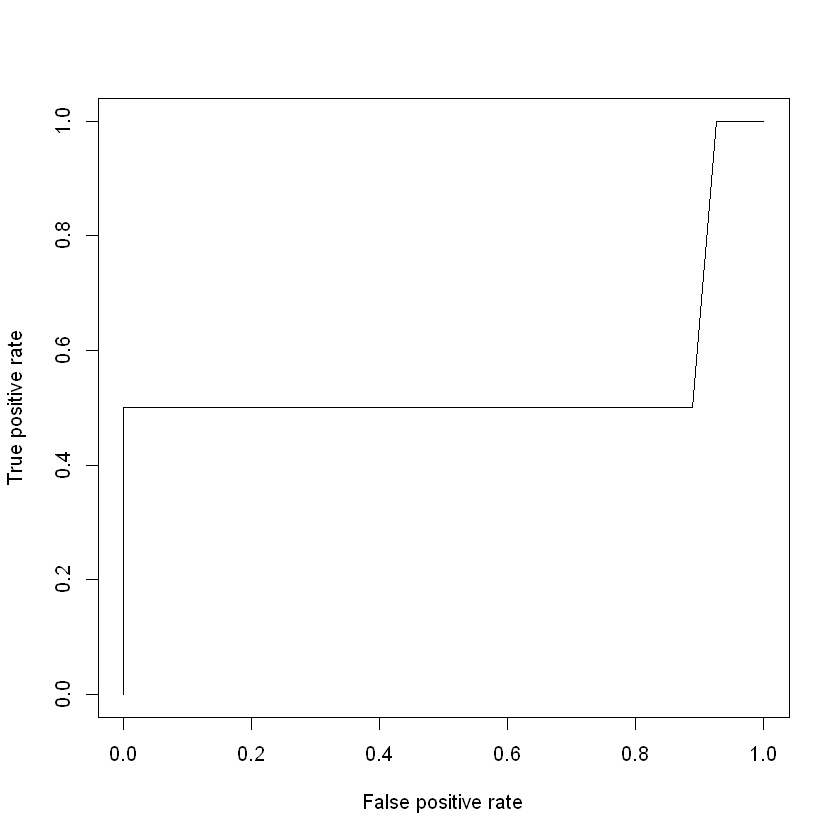

In [37]:
model <- glm(d3_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1229  -0.8315  -0.7428   1.3288   1.8935  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.61417    1.16436  -0.527    0.598
sexMale           -0.23001    0.72608  -0.317    0.751
definitionharmony  0.65020    0.83734   0.777    0.437
needharmony        0.09685    0.65469   0.148    0.882
purposecosmetic    0.31582    0.83617   0.378    0.706
purposeetc        -0.14877    0.81986  -0.181    0.856
interest          -0.26242    0.25192  -1.042    0.298

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 79.905  on 66  degrees of freedom
Residual deviance: 77.199  on 60  degrees of freedom
AIC: 91.199

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,66,79.90483,NA
sex,1,0.001075955,65,79.90376,0.9738327
definition,1,1.065214512,64,78.83854,0.3020289
need,1,0.069155166,63,78.76939,0.7925709
purpose,2,0.460202236,61,78.30918,0.7944533
interest,1,1.109779326,60,77.19941,0.2921299


[1] 0.3303571

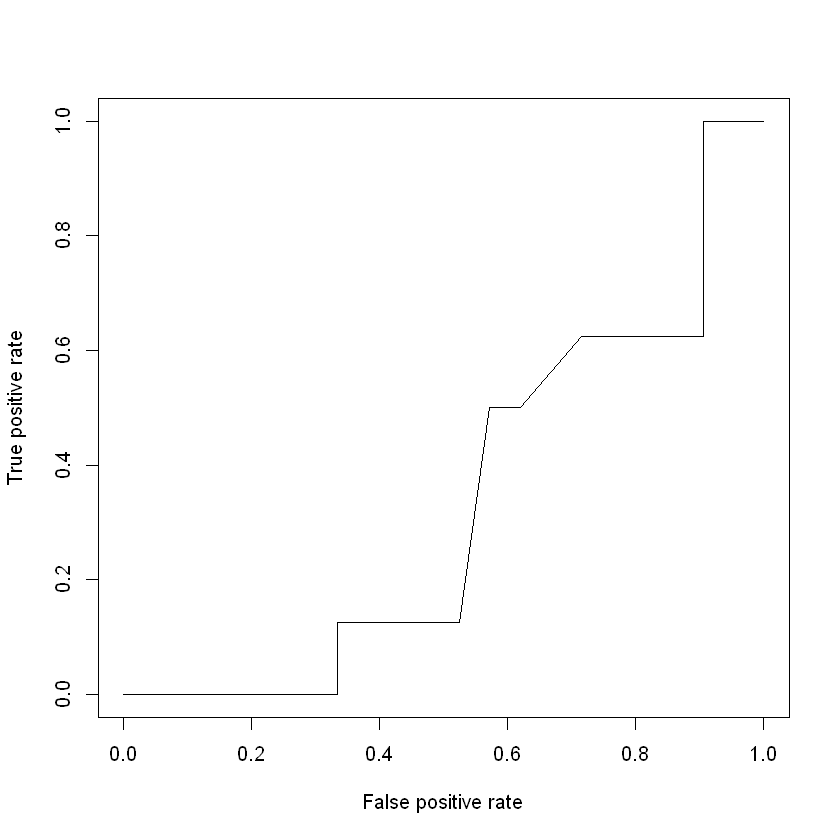

In [38]:
model <- glm(d3_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc